# 04. MLR실습

김보람  
2023-04-18

> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

# 선형회귀분석 CH0607

In [1]:
library(MASS)
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



# 데이터(Boston)

In [2]:
data(Boston)
head(Boston)

-   `보스턴 집값 데이터` 이 데이터는 보스턴 근교 지역의 집값 및 다른
    정보를 포함한다.

-   MASS 패키지를 설치하면 데이터를 로딩할 수 있다.

> -   B보스턴 근교 506개 지역에 대한 범죄율 (crim)등 14개의 변수로 구성
>
> • crim : 범죄율
>
> • zn: 25,000평방비트 기준 거지주 비율
>
> • indus: 비소매업종 점유 구역 비율
>
> • chas: 찰스강 인접 여부 (1=인접, 0=비인접)
>
> • nox: 일산화질소 농도 (천만개 당)
>
> • `rm`: 거주지의 평균 방 갯수 \*\*\*
>
> • age: 1940년 이전에 건축된 주택의 비율
>
> • dis: 보스턴 5대 사업지구와의 거리
>
> • rad: 고속도로 진입용이성 정도
>
> • tax: 재산세율 (10,000달러 당)
>
> • ptratio: 학생 대 교사 비율
>
> • black: 1000(B − 0.63)2, B: 아프리카계 미국인 비율
>
> • `lstat` : 저소득층 비율 \*\*\*\*
>
> • `medv`: 주택가격의 중앙값 (단위:1,000달러 당) 반응변수

## 산점도

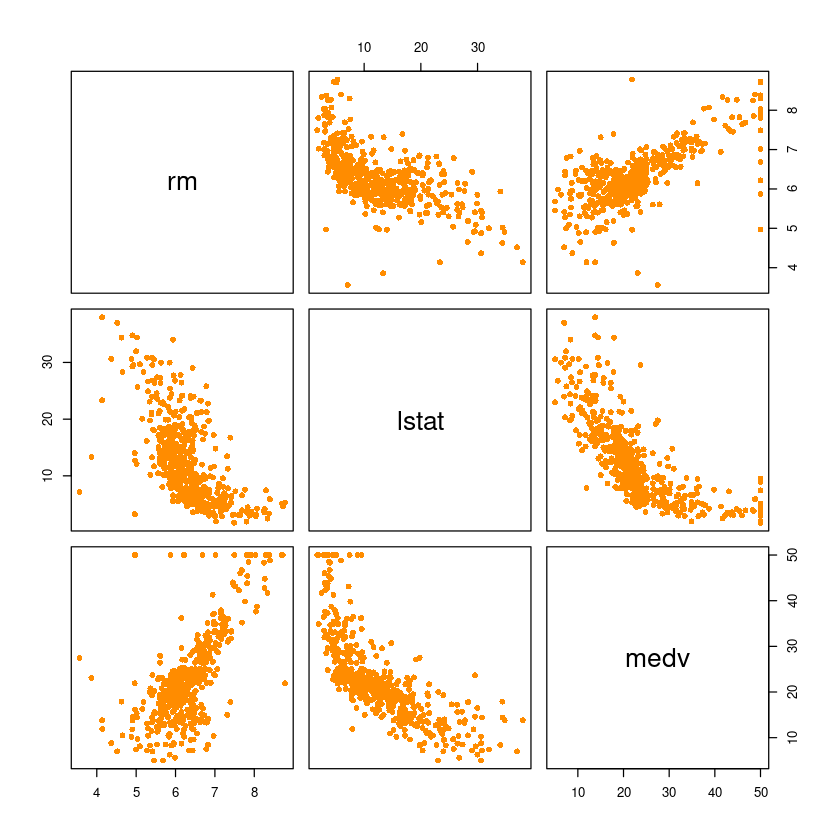

In [3]:
pairs(Boston[,which(names(Boston) %in% 
                      c('medv', 'rm', 'lstat'))], 
      pch=16, col='darkorange')


> -   마지막 행을 봐보자. 맨아래 왼쪽의 X축은 rm, Y축은 medv를 의미하고,
>     맨아래의 중간의 x축은 lstat를 의미한다.
>
> -   rm이 클수록 집값이 증가하고(직선관계처럼 보인다)
>
> -   lstat가 높아질수록 집값은 떨어지는 경향이 있다(곡선관계처럼
>     보인다. 처음엔 뚝 떨어지다가 천천히 감소)
>
> -   rm과 lstat의 다중공산성을 봐야해! \> 맨위 가운데 그림을 봐보자..

## 상관관계

In [5]:
# pairs(Boston, pch=16, col='darkorange')
cor(Boston[,which(names(Boston) %in% 
                    c('medv', 'rm', 'lstat'))])

-   rm과 medv는 양의 상관관계

-   lstat와 mdev는 음의 상관관계

-   rm과 lstat는 음의 상관관계

## 회귀모형 적합

In [6]:
fit_Boston<-lm(medv~rm+lstat, data=Boston)
summary(fit_Boston)


-   $y=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon , \  \epsilon$ ~
    $N(0,\sigma^2)$

-   모형을 적합하라는 것은, $\hat \beta_0, \hat \beta_1, \hat \beta_2$를
    구해서 $\hat y=$꼴로 적어주기

`-` summary 결과 해석

-   회귀직선의 유의성에 대한 가설검정이다.

-   $H_0: \beta_1=\beta_2=0$ vs $H_1: \beta_1 \neq 0$ or
    $\beta_2 \neq 0$

-   `F-statistic: 444.3`, F=MSR/MSE, `p-value: < 2.2e-16`:p-value가 아주
    작으므로 $H_0$를 기각할 수 있다. 즉 회귀직선은 유의하다.

-   `Residual standard error: 5.54` =
    $\sqrt{MSE} = \sqrt{\widehat \sigma^2} = \widehat \sigma^2$

-   `Pr(>|t|)`:양측 검정에 대한 유의성 검정

-   `Estimate` 추정량,
    $\hat \beta_0=-1.35827, \hat \beta_1=5.09479, \hat \beta_2=-0.64236$

-   `Std. Error` = $s.e(\widehat \beta_i) = \dfrac{\sigma^2}{c_{ii}}$
    이고,
    $\widehat {s.e}(\widehat \beta_i)\sqrt{\dfrac{\widehat \sigma^2}{c_{ii}}}$

-   `t value`는
    $t_0 = \dfrac{\widehat \beta_i - 0}{\widehat {s.e}(\widehat \beta_i)}$

-   절편은 유의하지 않다.

-   `Residuals`: 잔차해석. 0을 기준으로 대칭인가? 봤는데 max가 훨씬 더
    커서 오른쪽으로 꼬리가 더 길 수 있겠네? 생각 가능

## matrix

In [18]:

n = nrow(Boston)
X = cbind(rep(1,n), Boston$rm, Boston$lstat)
y = Boston$medv

In [15]:
head(X) # 506X3 행렬

In [17]:
head(y) # medv값, 506x1행렬

In [19]:
# beta = 3x1 행렬

## ***y*** = X$\beta$ + $\epsilon \rightarrow \widehat \beta = (X^TX)^{-1}X^Ty$

In [23]:
beta_hat = solve(t(X)%*%X) %*% t(X) %*% y   # t(X): X^T를 의미함 
beta_hat
coef(fit_Boston)

-   `t(X)`: $X^T$를 의미

-   `%*%` : 행렬곱의미

-   `solve()` : 역행렬 구하는 함수

-   $\widehat y = X \widehat \beta$

In [24]:
y_hat = X %*% beta_hat
y_hat[1:5]
fitted(fit_Boston)[1:5]

-   y_hat\[1:5\] 과 fitted(fit_Boston)\[1:5\] 값이 동일한 것을 확인 가능

In [25]:
sse <- sum((y - y_hat)^2) ##SSE
sqrt(sse/(n-2-1)) ##RMSE
summary(fit_Boston)$sigma

-   $SSE = \sum (y_i - \widehat y_i)^2$

-   $RMSE = \sqrt{SSE/(n-p-1)} = \widehat \sigma$

## lm사용

In [27]:
dt <- Boston[,which(names(Boston) %in% c('medv', 'rm', 'lstat'))]
head(dt)

In [30]:
fit_Boston<-lm(medv~., data=dt)           # boston의 설명변수 13개 모두 다 사용하고 싶을때 (물결 뒤에 점을 찍어주기!!)
fit_Boston<-lm(medv~rm+lstat, data=dt)    # 설명변수 중 원하는 것만 사용하고 싶을때

In [31]:
summary(fit_Boston)

-   hat y = -1.3583 + 5.0948*rm - 0.6424*lstat

## 분산분석:회귀직선의 유의성 검정

-   $H_0: \beta_1=\beta_2=0$ vs $H_1: \beta_1 \neq 0$ or
    $\beta_2 \neq 0$

-   $H_0$: 귀무가설, null hypothesis, 영가설 -\> $y=\beta_0$

-   $H_1$: 대립가설 -\> $y= \beta_0 + \beta_1 x_1 + \beta_2 x_2$

In [33]:
anova(fit_Boston) ## XXX

-   설명변수가 두개로 쪼개져서 나온다.

In [35]:
null_model <- lm(medv~1, data=dt)  #H0
fit_Boston <- lm(medv~., data=dt)  #H1

anova(null_model, fit_Boston) ##***

-   `null_model` : 설명모델을 안쓰고 절편만 가져가는 모델. 1만
    쓴다.(절편만)

-   `RSS`의 $15439.31=SSE=\sum(y_i - \widehat y_i)^2$이고
    $42716.30 = \sum(y_i - \bar y)^2=SST$

-   SST와 SSE를 비교해서 적합이 잘 되어있는지 확인

-   `Sum of Sq`의 $27276.99=SSR$

-   `F` = $\dfrac{SSR/P}{SSE/(n-p-1)}$

## $\beta$의 신뢰구간

$\widehat \beta_i \pm t_{a/2} (n-p-1) \widehat{s.e}(\widehat \beta_i)$

In [38]:
vcov(fit_Boston)  ##var(hat beta) = (X^TX)^-1 \sigma^2

-   공분산 행렬 값

-   $Var(\widehat \beta_1)=0.19754958, Var(\widehat \beta_2)= 0.001912441$

In [39]:
#코드
confint(fit_Boston, level = 0.90)

#수식(직접계산)
coef(fit_Boston) + qt(0.975, 503) * summary(fit_Boston)$coef[,2]
coef(fit_Boston) - qt(0.975, 503) * summary(fit_Boston)$coef[,2]

-   $n=506, p=2$

-   `summary(fit_Boston)$coef[,2]` : s.e

## 평균반응, 개별 y 추정

-   E(Y\|x0), y = E(Y\|x0) + epsilon

In [40]:
new_dt <- data.frame(rm=7, lstat=10)

In [42]:
predict(fit_Boston, newdata = new_dt)
c(1,7,10)%*%beta_hat  # hat y0 = -1.3583 + 5.0948*7 - 0.6424*10

-   $x_{0}=\begin{pmatrix} 1 \\ 7 \\ 10 \end{pmatrix}, \widehat{y}_{0}=x_{0}^{T}\beta$

In [43]:
predict(fit_Boston, 
        newdata = new_dt,
        interval = c("confidence"), 
        level = 0.95)  ##평균반응

In [44]:
predict(fit_Boston, newdata = new_dt, 
        interval = c("prediction"), 
        level = 0.95)  ## 개별 y

## 절편을 포함하지 않는 회귀직선 (원점을 지나는 회귀직선)

-   $y=\beta_1 x_1 + \beta_2 x_2$

In [45]:
fit_Boston0 <- lm(medv ~ 0 + rm + lstat, dt)
summary(fit_Boston0)
summary(fit_Boston)

-   $Adjusted R-squared: 0.9482$ vs $0.6371$

-   $R^2=\dfrac{SSR}{SST}=\dfrac{\sum(\widehat y_i - \bar y)^2}{\sum(y_i-\bar y)^2}$=$\dfrac{설명변수 없을때와 있을때의 차이}{y의변동이 평균으로부터 얼마나 떨어져 있는지}$

-   절편이 없는 모형의
    $R^2=\dfrac{\sum(\widehat y_i - 0)^2}{\sum(y_i-0)^2}$: 원점으로부터
    얼마나 떨어져있는가. 기본적으로 엄청 큰 값을 가지게 된다.

> 절편이 있다 vs 절편이 없다 에서는 $R^2$과 $RMSE=\widehat \sigma$를
> 확인해주는 게 좋다.
>
> RMSE비교 $5.536$ vs $5.54$ -\> 별로 차이가 없네?

## 잔차분석

-   epsilon : 선형성, 등분산성, 정규성, 독립성

In [46]:
yhat <- fitted(fit_Boston)
res <- resid(fit_Boston)

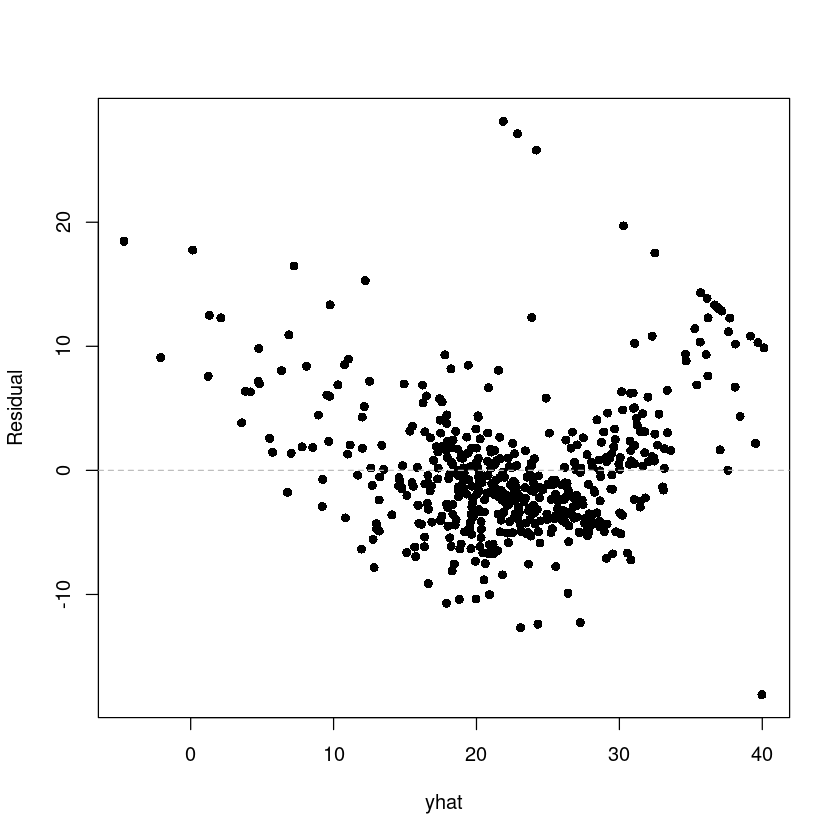

In [48]:
plot(res ~ yhat,pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')

-   선형성 애매함

### 등분산성

-   H0 : 등분산 vs. H1 : 이분산 (Heteroscedasticity)

In [49]:
bptest(fit_Boston)

-   p-value가 커서 기각을 못했다. 즉 등분산이다.

### 정규성

-   잔차의 QQ plot

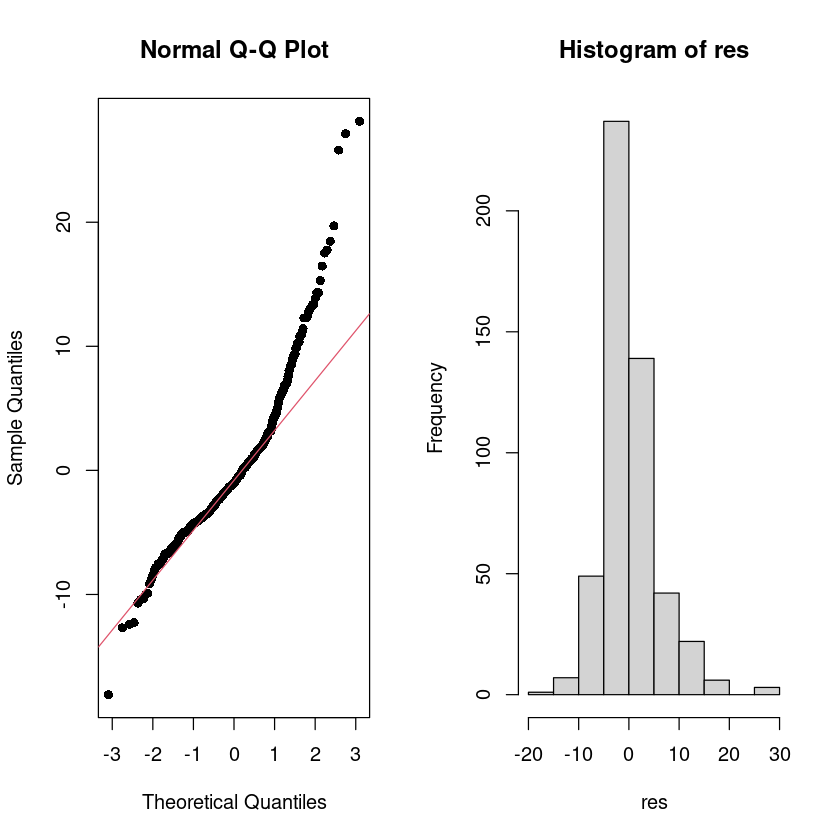

In [51]:
par(mfrow=c(1,2))
qqnorm(res, pch=16)
qqline(res, col = 2)

hist(res)
par(mfrow=c(1,1))

-   이상치가 있는 듯 하다ㅡ

-   Shapiro-Wilk Test

In [55]:

## H0 : normal distribution  vs. H1 : not H0
shapiro.test(res)

-   정규분포 아니다

### 독립성 검정 DW test

-   H0 : uncorrelated vs H1 : rho != 0

In [54]:
dwtest(fit_Boston, alternative = "two.sided") 

-   독립이라고 할 수 없다.

## 가설검정: FM, RM

In [56]:
reduced_model = lm(medv ~ rm+lstat, data = Boston) #(q=2) 
full_model = lm(medv ~ ., data=Boston) #(P=13) full model

# r=p-q=11

In [57]:
summary(full_model)
summary(reduced_model)

-   reduced_model보다는 full_model이 더 좋아 보인다. (R^2와
    RMSE확인햇을떄)

-   13개 중 11개 변수가 유의함을 확인 가능

### 가설검정

RM : $H_0: \beta_1= \dots = \beta_5 = \beta_7 = \dots = \beta_{12} = 0$

In [59]:
anova(reduced_model, full_model)

$F = \dfrac{(SSE_{RM}-SSE_{RM})/r}{SSE_{FM}/(n-p-1)}=\dfrac{(SSR_{FM}-SSR_{RM})/r}{SSE_{FM}/(n-p-1)}=17.60431$

-   `RSS` : SSE를 의미. RM의 $SSE=15439.31$, FM의 $SSE=11078.78$

-   `Res.Df`: $n-q-1=503, n-p-1=492$

In [61]:
#강의록에 있는 수식
p <- full_model$rank-1
q <- reduced_model$rank-1
SSE_FM <- anova(full_model)$Sum[p+1] #SSE_FM
SSE_RM <- anova(reduced_model)$Sum[q+1]  #SSE_RM

F0 <- ((SSE_RM-SSE_FM)/(p-q))/(SSE_FM/(nrow(Boston)-p-1))
F0

In [63]:
#기각역 F_{0.05}(p-q,n-p-1)
qf(0.95,p-q,nrow(Boston)-p-1)
# p-value -> 해당강의 20분쯤.. 어렵
1-pf(F0, p-q,nrow(Boston)-p-1)


In [66]:
#################################
reduced_model = lm(medv ~ .-age-indus, data = Boston)  # 유의하지 않은 2개 변수 제거(-age-indus)
full_model = lm(medv ~ ., data=Boston) # 13개 변수

anova(reduced_model, full_model)


-   $H_0: \beta_{indus} = \beta_{age} = 0$ 이고 H0기각 못하므로 빼도
    된다.

## General linear hypothesis

-   선형 가설 검정

In [67]:
x1<-c(4,8,9,8,8,12,6,10,6,9)
x2<-c(4,10,8,5,10,15,8,13,5,12)
y<-c(9,20,22,15,17,30,18,25,10,20)
fit<-lm(y~x1+x2)  ##FM
summary(fit)

-   $H_0 : T\beta = c$

In [78]:
# install.packages("car")

> -   $H_0 : \beta_1 = 1$
>
> $y=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$ 에서
>
> $y=\beta_0 + x_1 + \beta_2 x_2 + \epsilon$ 이 된다.
>
> 즉, $y-x_1 = \beta_0 + \beta_2 x_2 + \epsilon$
>
> 단순성형회귀모형이 되는것..(z)

In [72]:
library(car)
linearHypothesis(fit, c(0,1,0), 1)

-   오류가 나넹.. Rstudio에서 돌린거

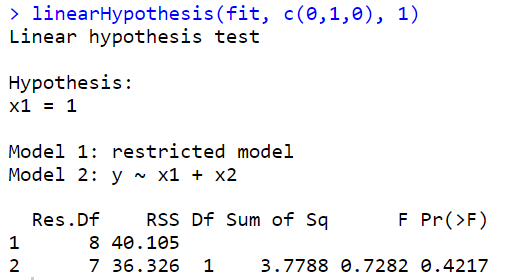

-   기각 못한다. beta1=1

-   $H_0 : \beta_1 = \beta_2$

``` r
#b1-b2=0 => (0,1,-1) *beta 
#H_0 : beta_1 = beta2
linearHypothesis(fit, c(0,1,-1), 0)
```

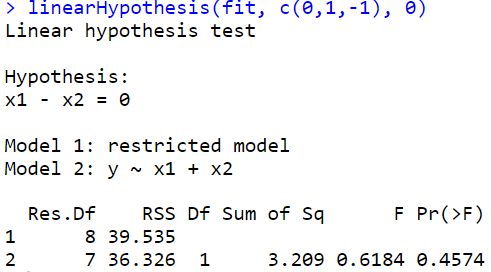

-   $H_0 : \beta_1 = \beta_2+1$

``` r
#H_0 : beta_1 = beta2 + 1
linearHypothesis(fit, c(0,1,-1), 1)
```

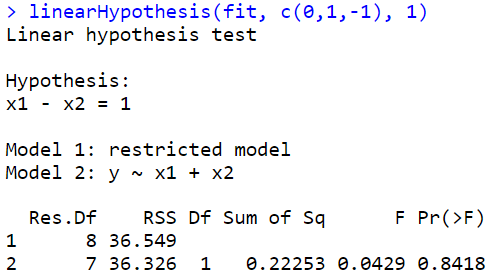

-   $H_0 : \beta_1 = \beta_2+5$

``` r
#H_0 : beta_1 = beta2 + 5
linearHypothesis(fit, c(0,1,-1), 5)
```

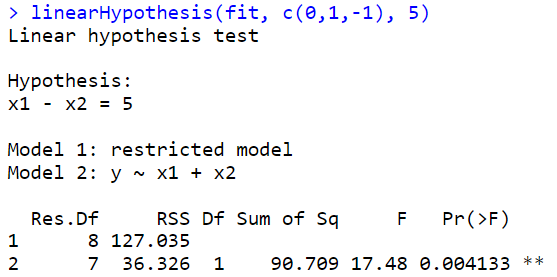

-   5로 바꾸고 나니까 기각할 수 있다.

`-` 강의노트 코드

In [80]:
##H_0 : beta_1 = beta2 + 1
#y=b0 + b1x1 + b2x2 + e = b0+x1 + b2(x1+x2)+e
#y-x1 = b0+b2(x1+x2)+e :   RM

In [82]:
y1 <- y-x1
z1 <- x1 + x2

In [83]:
fit2 <- lm(y1~z1)
summary(fit2)
anova(fit2)

In [84]:
anova(fit)  ##FM
anova(fit2)  #RM

In [86]:
# F = {(SSE_RM - SSE_FM)/r} / {SSE_FM/(n-p-1)}
p <- fit$rank-1
q <- fit2$rank-1
SSE_FM <- anova(fit)$Sum[p+1] #SSE_FM
SSE_RM <- anova(fit2)$Sum[q+1]  #SSE_RM
F0 <- ((SSE_RM-SSE_FM)/(p-q))/(SSE_FM/(length(y)-p-1))
F0

In [87]:
#기각역 F_{0.05}(p-q,n-p-1)
qf(0.95,p-q,length(y)-p-1)
# p-value
pf(F0, p-q,length(y)-p-1,lower.tail = F)